# Mushroom Project

In [137]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s

import warnings
warnings.filterwarnings('ignore')

In [102]:
mu=pd.read_csv('mushroom.csv')
mu.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


we can observe that this is Classificaton model

In [103]:
mu.shape

(8124, 23)

we have 8124 rows and 23 columns

In [104]:
mu.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We have string type of data

We can observe that this is classification problem

In [105]:
mu.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We can observe there is no misssing values

In [106]:
mu['class'].unique()
#unique values in target varibale

array(['p', 'e'], dtype=object)

Here two values in target varibale 'class'

In [107]:
mu['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

we can observe that we have class imbalance in our target variable

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

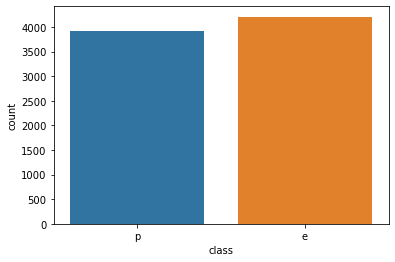

In [108]:
s.countplot(mu['class'])

We can observe that the imbalance of the data

Seperating Independent and Target variable

In [110]:
x=mu.drop(['class'],axis=1)
y=mu[['class']]

y is our target variable and x is the indeppendent variables

In [111]:
y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [112]:
mu.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Names of the columns

# Encoding

In [113]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
x=OE.fit_transform(x)
#encoded independent variables

In [114]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=LE.fit_transform(y)
#encoded target variables

In [115]:
print(x,y)

[[5. 2. 4. ... 2. 3. 5.]
 [5. 2. 9. ... 3. 2. 1.]
 [0. 2. 8. ... 3. 2. 3.]
 ...
 [2. 2. 4. ... 0. 1. 2.]
 [3. 3. 4. ... 7. 4. 2.]
 [5. 2. 4. ... 4. 1. 2.]] [1 0 0 ... 0 1 0]


We encoded target and independent variables using ordinal and label encoder

# Treating Imbalance of the dataset

# UnderSampling

In [116]:
from imblearn.under_sampling import NearMiss
NM=NearMiss()
x_new,y_new=NM.fit_resample(x,y)

We balance the dataset

In [117]:
#importing the modules for models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=48)

Split the data into training and testing data

In [119]:
x_train.shape

(6093, 22)

In [120]:
y_train.shape

(6093,)

In training dataset we have 6093 rows

In [121]:
x_test.shape

(2031, 22)

In [122]:
y_test.shape

(2031,)

In testing dataset we have 2031 rows

In [123]:
#decisiontreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddtc=DTC.predict(x_test)
acc=classification_report(y_test,preddtc)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



accuracy of Decision tree is 100

In [124]:
#random forest
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrfc=RFC.predict(x_test)
acc=classification_report(y_test,predrfc)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



accuracy_score of random forest classifier is also 100

In [125]:
#support vector machine
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
acc=classification_report(y_test,predsvc)
print(acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1048
           1       1.00      0.97      0.99       983

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



accuracy_score of support vector machine is 99

In [126]:
#Knearest classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc=classification_report(y_test,predknn)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Accuracy of knearest classifier is 100

# Cross validation score

In [127]:
#importing modules
from sklearn.model_selection import cross_val_score

In [128]:
#checking mean of cross validation score of decision tree
print(cross_val_score(DTC,x,y,cv=6).mean())

0.9204825209256523


cv score of decision tree is 92

In [129]:
#checking mean of cross validation score of random forest
print(cross_val_score(RFC,x,y,cv=6).mean())

0.9262678483505663


cv score of random forest is 93

In [130]:
#checking mean of cross validation score of support vector machine
print(cross_val_score(svc,x,y,cv=6).mean())

0.8835548990645004


cv score of support vector is 88

In [131]:
#checking mean of cross validation score of knearestclassifier
print(cross_val_score(knn,x,y,cv=6).mean())

0.9293451501723289


CV score of knearestclassifier is 92

So the least difference accuarcy score and cv score of random forest classifier is less compare other 3 algorithms
so we take random forest as our best model

# Hyper Parameter Tuning

In [132]:
#importing module for hyper parameter
from sklearn.model_selection import GridSearchCV
import numpy as np

In [133]:
parameter={'n_estimators': np.arange(25,50),
           'max_depth':np.arange(2,10),
          'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}

Store parametersin variable

In [134]:
GV=GridSearchCV(RFC,parameter,cv=7)

Calling through gridsearch cv

In [138]:
GV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49])})

we have fitted the trained data

In [139]:
GV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 28}

We got best parameters

Performing model with best parameters

In [142]:
final=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=28)
final.fit(x_train,y_train)
predfinal=final.predict(x_test)
acc=accuracy_score(y_test,predfinal)
print(acc*100)

98.91678975873953


So we got 98.9% accuracy

# Saving the model

In [143]:
import joblib as jb
jb.dump(final,"Final.pkl")

['Final.pkl']

We store the model in .pkl file